In [12]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

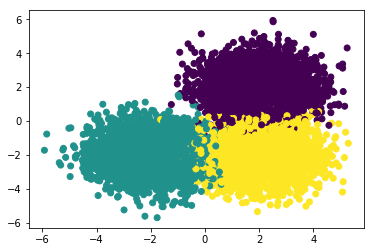

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [3]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


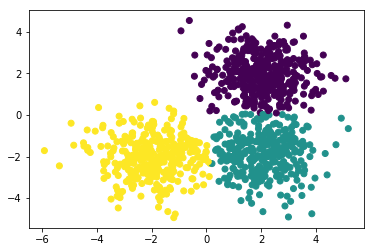

Comparing the assigned categories to the ones in the data:


col_0,0,1,2
row_0,,,
0,352,10,0
1,1,8,311
2,6,304,8


In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
display(pd.crosstab(y_train,labels))

# Spectral Clustering

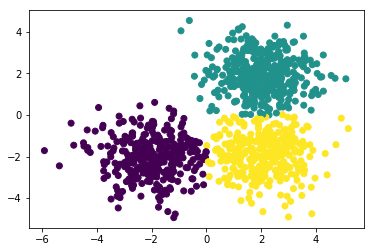

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  357    5
1      310    1    9
2        5    7  306


In [5]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

## Affinity propagation

In [6]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
import time
start = time.time()

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print("Done", time.time() - start)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done 6.702131748199463
Estimated number of clusters: 32


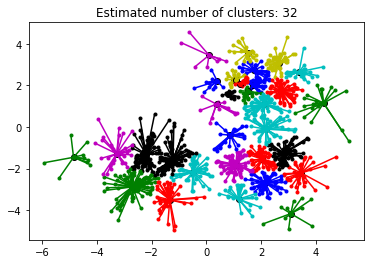

In [7]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

# Take 1:
triangle of blobs that are a little closer together

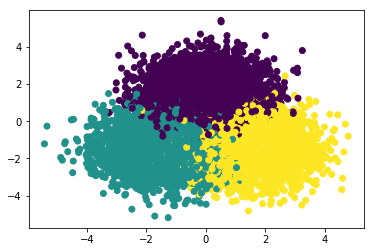

In [17]:
# The coordinates of the centers of our blobs.
centers = [[0, 1.5], [-1.5, -1.5], [1.5, -1.5]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

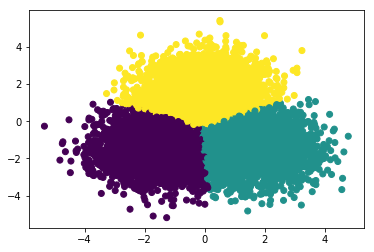

col_0,0,1,2
row_0,,,
0,106,149,2717
1,2713,181,119
2,183,2725,107


In [21]:
#KMEANS
km = KMeans(n_clusters=3).fit(X_train)
ypred = km.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1],  c=ypred)
plt.show()
pd.crosstab(y_test, ypred)

Number of estimated clusters: 2


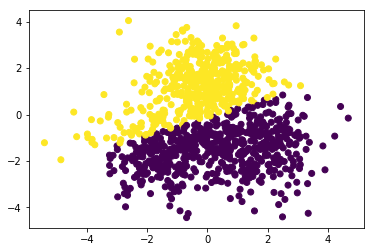

Comparing the assigned categories to the ones in the data:


col_0,0,1
row_0,,
0,24,338
1,253,67
2,307,11


In [24]:
#MeanShift
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
# Extract cluster assignments for each data point.
labels = ms.labels_
# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_
# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()
print('Comparing the assigned categories to the ones in the data:')
display(pd.crosstab(y_train,labels))

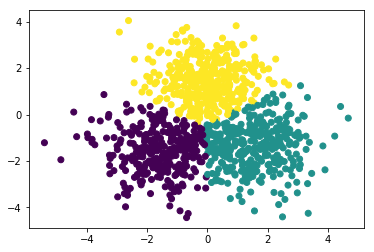

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        7   17  338
1      276   32   12
2       12  295   11


In [27]:
#Spectral Clustering
# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

Done 2.4408469200134277
Estimated number of clusters: 30


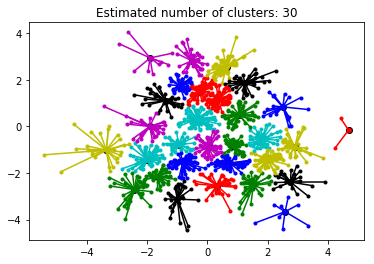

In [32]:
# AFfinity Propagation
start = time.time()

# Declare the model and fit it in one statement.
af = AffinityPropagation(damping=.9).fit(X_train)
print("Done", time.time() - start)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_
print('Estimated number of clusters: {}'.format(n_clusters_))
plt.figure(1)
plt.clf()
# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

Kmeans or Spectral performed best because we knew how many clusters to give it, while those clusters were not clearly separable in the data. 

# TAKE two
4 Clearly separated blobs

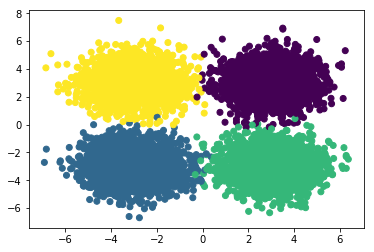

In [37]:
# The coordinates of the centers of our blobs.
n = 3
centers = [[n, n], [-n, -n], [n, -n], [-n, n]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.8,
    random_state=42)

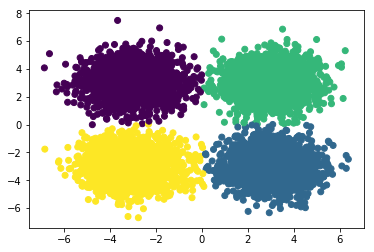

col_0,0,1,2,3
row_0,,,,
0,3,3,1989,0
1,3,1,0,2005
2,0,1991,2,7
3,1994,0,1,1


In [38]:
#KMEANS
km = KMeans(n_clusters=4).fit(X_train)
ypred = km.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1],  c=ypred)
plt.show()
pd.crosstab(y_test, ypred)

Number of estimated clusters: 4


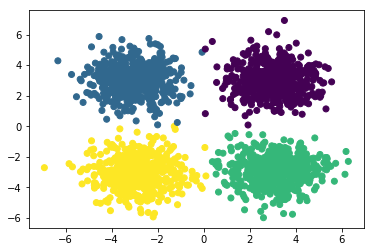

Comparing the assigned categories to the ones in the data:


col_0,0,1,2,3
row_0,,,,
0,505,0,0,0
1,0,0,1,490
2,0,0,497,3
3,1,502,0,1


In [39]:
#MeanShift
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
# Extract cluster assignments for each data point.
labels = ms.labels_
# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_
# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()
print('Comparing the assigned categories to the ones in the data:')
display(pd.crosstab(y_train,labels))

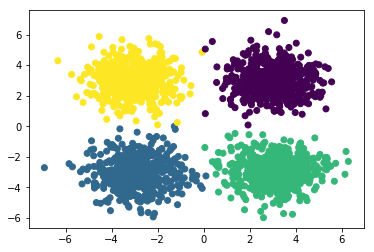

Comparing the assigned categories to the ones in the data:


col_0,0,1,2,3
row_0,,,,
0,505,0,0,0
1,0,490,1,0
2,0,2,498,0
3,1,1,0,502


In [41]:
#Spectral Clustering
# We know we're looking for four clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
display(pd.crosstab(y_train,predict))

Estimated number of clusters: 25


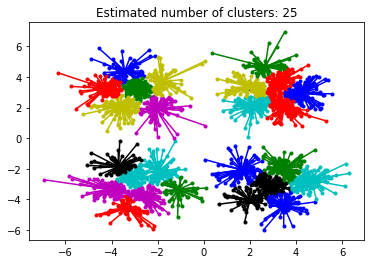

In [43]:
# Affinity Propagation


# Declare the model and fit it in one statement.
af = AffinityPropagation(damping=.9).fit(X_train)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_
print('Estimated number of clusters: {}'.format(n_clusters_))
plt.figure(1)
plt.clf()
# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

Kmeans, meanshift, and Spectral all did great on this easy dataset. Affinity Propagation initially returned 360+ clusters. Obviously, it still separated the real clusters, so it's not as if any of these clusters overlapped the true clusters. in other words, the results are meangingful, just inconvenient. 
Increasing Damping to .9 reduced it to 25 clusters, which still were MECE with the original 4.

# TAKE 3:
4 clusters, two touching but separated pairs

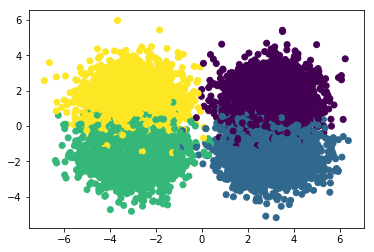

In [45]:
# The coordinates of the centers of our blobs.
centers = [[3, 1.5], [3, -1.5], [-3, -1.5], [-3, 1.5]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.8,
    random_state=42)

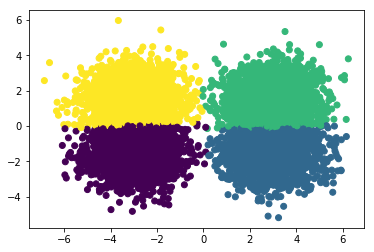

col_0,0,1,2,3
row_0,,,,
0,0,123,1871,1
1,5,1856,148,0
2,1869,3,0,128
3,133,0,0,1863


In [46]:
#KMEANS
km = KMeans(n_clusters=4).fit(X_train)
ypred = km.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1],  c=ypred)
plt.show()
pd.crosstab(y_test, ypred)

Number of estimated clusters: 3


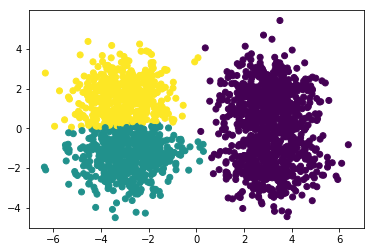

Comparing the assigned categories to the ones in the data:


col_0,0,1,2
row_0,,,
0,504,0,1
1,488,3,0
2,1,474,25
3,0,37,467


In [48]:
#MeanShift
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
# Extract cluster assignments for each data point.
labels = ms.labels_
# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_
# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()
print('Comparing the assigned categories to the ones in the data:')
display(pd.crosstab(y_train,labels))

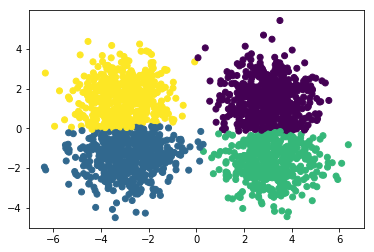

Comparing the assigned categories to the ones in the data:


col_0,0,1,2,3
row_0,,,,
0,487,0,18,0
1,41,2,448,0
2,0,468,0,32
3,0,31,0,473


In [49]:
#Spectral Clustering
# We know we're looking for four clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
display(pd.crosstab(y_train,predict))

Estimated number of clusters: 30


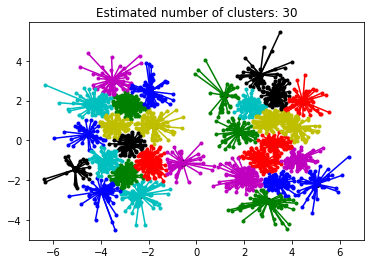

In [53]:
# Affinity Propagation


# Declare the model and fit it in one statement.
af = AffinityPropagation(damping=.95).fit(X_train)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_
print('Estimated number of clusters: {}'.format(n_clusters_))
plt.figure(1)
plt.clf()
# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

Clearly, knowing the right number of clusters is very helpful. Kmeans and spectral both did well on this, while the meansshift attempt merged 2 of the 4 and returned only 3. 

Affinity Propagation initially returned 700+ clusters. Increasing Damping to .9 reduced it to 30 clusters. Interestingly, it's not clear to me that there's a clean line between the groups. Not only are their clusters that overlap the touching groups significantly (that's to be expceted), there's even a few clusters that reached "across the aisle" to the other pair and grabbed a couple points.

# TAKE Four
Easily separable clusters, but with varying variances

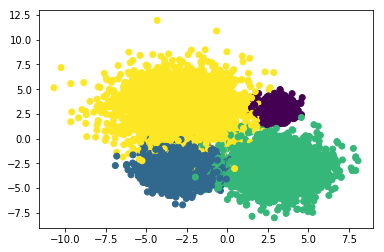

In [54]:
# The coordinates of the centers of our blobs.
n = 3
centers = [[n, n], [-n, -n], [n, -n], [-n, n]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=[.5,1,1.5,2],
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.8,
    random_state=42)

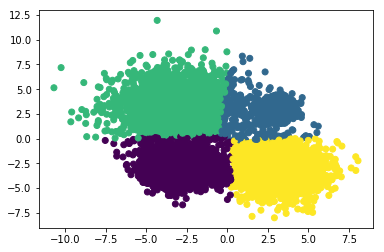

col_0,0,1,2,3
row_0,,,,
0,0,1995,0,0
1,2008,0,1,0
2,68,54,0,1878
3,145,172,1669,10


In [55]:
#KMEANS
km = KMeans(n_clusters=4).fit(X_train)
ypred = km.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1],  c=ypred)
plt.show()
pd.crosstab(y_test, ypred)

Number of estimated clusters: 4


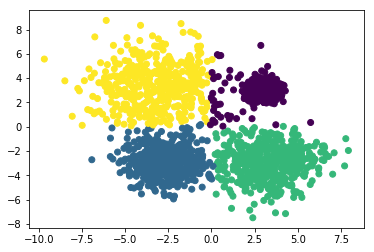

Comparing the assigned categories to the ones in the data:


col_0,0,1,2,3
row_0,,,,
0,505,0,0,0
1,0,490,1,0
2,7,17,476,0
3,29,27,3,445


In [56]:
#MeanShift
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
# Extract cluster assignments for each data point.
labels = ms.labels_
# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_
# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()
print('Comparing the assigned categories to the ones in the data:')
display(pd.crosstab(y_train,labels))

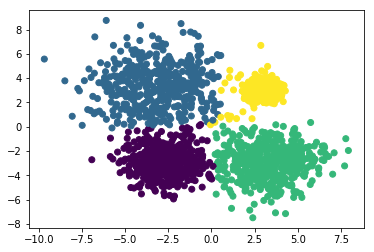

Comparing the assigned categories to the ones in the data:


col_0,0,1,2,3
row_0,,,,
0,0,0,0,505
1,490,0,1,0
2,17,1,478,4
3,26,462,4,12


In [57]:
#Spectral Clustering
# We know we're looking for four clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
display(pd.crosstab(y_train,predict))

Estimated number of clusters: 28


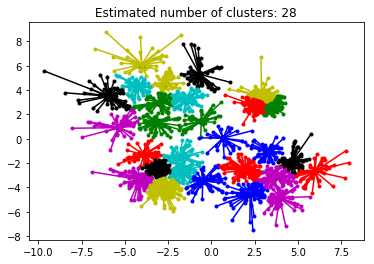

In [58]:
# Affinity Propagation


# Declare the model and fit it in one statement.
af = AffinityPropagation(damping=.95).fit(X_train)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_
print('Estimated number of clusters: {}'.format(n_clusters_))
plt.figure(1)
plt.clf()
# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

Kmeans returns evenly sized clusters by default, so this was never going to work out in this case.

Meanshift did impressively well here; It both correctly figured out there are 4 blobs, and also sized them quite well. 

Spectral was my predicted winner, and sure enough it did slightly better than meanshift since it's fed the number of clusters to find. It also size dwell. 

Affinity Propagation did interestingly well with damping at .95. It returns 28 clusters; the smallest true cluster is represented by 3 clean predicted clusters, and the other 3 blobs are separated pretty well except for one that overlaps a little bit. Besides the minor inconvenience of consolidating clusters, this does quite well. 